**TASK-3:IRIS FLOWER CLASSIFICATION**

**IMPORTING LIBRARIES**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATASET**

In [11]:
df = pd.read_csv('/content/IRIS.csv')

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#number of rows and columns
df.shape

(150, 5)

In [15]:
#basic information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**CHECKING FOR MISSING VALUES**

In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values

In [17]:
#Checking for species count
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [18]:
#converting the species into numerical data
from sklearn.preprocessing import LabelEncoder

In [19]:
encode=LabelEncoder()

In [20]:
df['species']=encode.fit_transform(df[['species']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**VISUALIZING THE DATA**

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

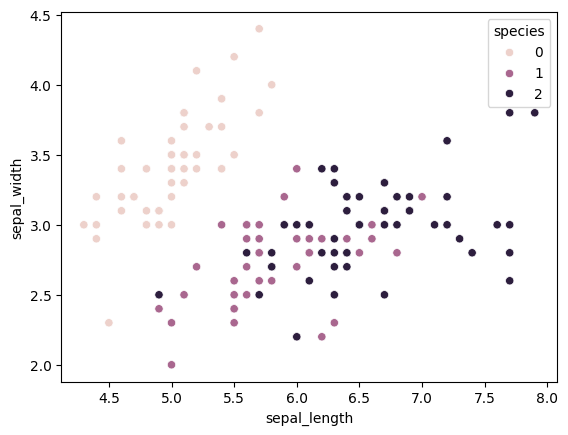

In [32]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

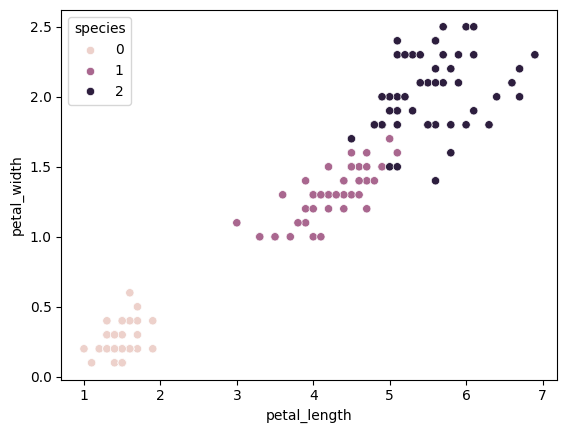

In [33]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

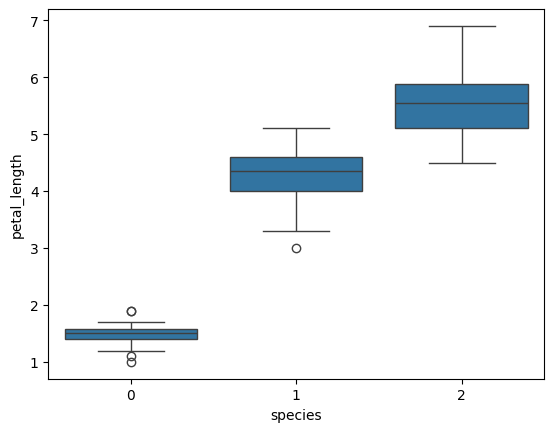

In [65]:
sns.boxplot(x="species", y="petal_length", data=df)

<Axes: xlabel='species', ylabel='petal_width'>

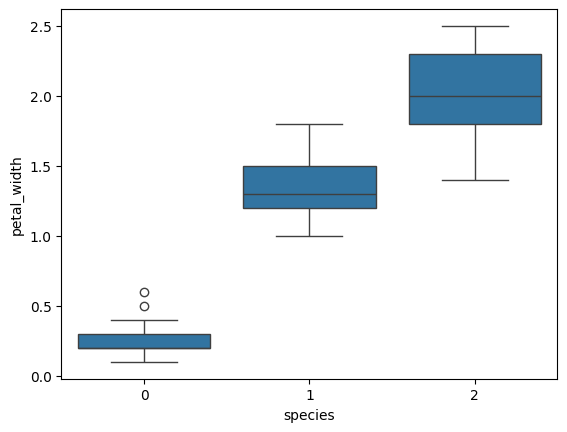

In [62]:
sns.boxplot(x="species", y="petal_width", data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

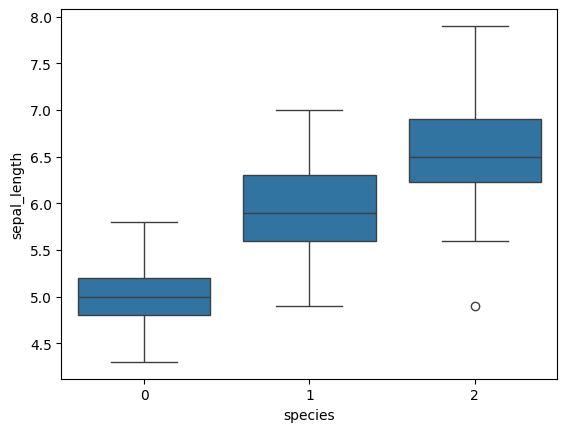

In [63]:
sns.boxplot(x="species", y="sepal_length", data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

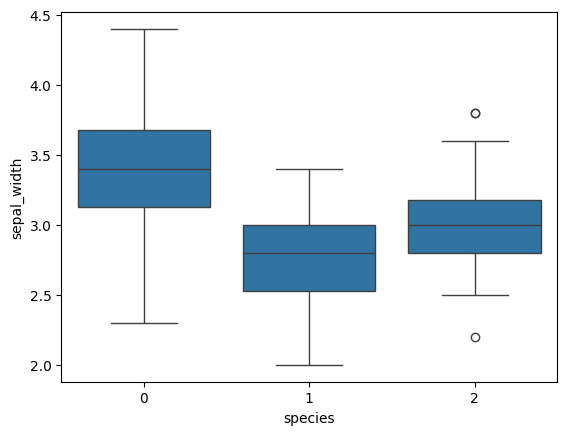

In [64]:
sns.boxplot(x="species", y="sepal_width", data=df)

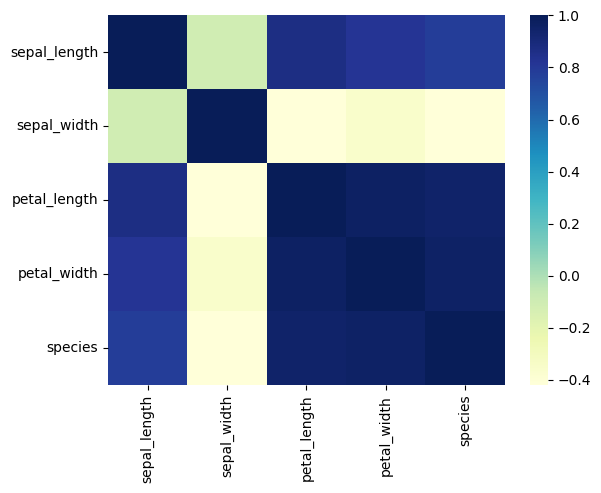

In [58]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

**MODEL BUILDING**

In [34]:
X=df.drop(columns=['species'],axis=1)
Y=df['species']

In [35]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [36]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


**TRAINING DATA AND TESTING DATA**

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


**LOGISTIC REGRESSION**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression()

In [41]:
model.fit(X_train,Y_train)

LogisticRegression()

**MODEL PREDICTION**

In [42]:
X_train_prediction=model.predict(X_train)

In [43]:
print(X_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 1 0]


In [44]:
import sklearn.metrics

df_accuracy=sklearn.metrics.accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of the training data:',df_accuracy)

Accuracy score of the training data: 0.975


In [45]:
X_test_prediction=model.predict(X_test)

In [46]:
print(X_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [47]:
df_accuracy=sklearn.metrics.accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of the test data:',df_accuracy)

Accuracy score of the test data: 0.9666666666666667
